## Muhammad Fikri
## 2109106010
## Informatika A1-21
### Posttest 5 supervised learning

In [36]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import numpy as np

In [55]:
dataset = pd.read_csv('telecom_churn.csv')
dataset

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.70,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.70,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.00,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.00,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.00,3,166.7,113,41.0,7.42,10.1
...,...,...,...,...,...,...,...,...,...,...,...
784,0,107,1,1,3.02,1,281.1,83,90.2,7.19,11.2
785,0,69,1,0,0.00,3,228.2,70,62.0,13.19,10.7
786,0,85,1,0,0.00,0,209.8,82,53.0,9.73,11.3
787,1,24,1,0,0.00,2,265.6,86,63.0,10.44,11.1


### cek data apakah ada yang NULL atau kosong

In [56]:
dataset.isna().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

### cek data apakah ada yang duplicate

In [57]:
dataset.duplicated().sum()

0

## data spliting

In [58]:
X = dataset[['AccountWeeks', 'DataUsage', 'DayMins', 'OverageFee' ]]
Y = dataset['Churn']

In [59]:
from sklearn.model_selection import train_test_split

In [60]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [ ]:
print("Dimensi X_train: ", X_train.shape)
print("Dimensi X_test: ", X_test.shape)
print("Dimensi y_train: ", Y_train.shape)
print("Dimensi y_test: ", Y_test.shape)

Dimensi X_train:  (591, 4)
Dimensi X_test:  (198, 4)
Dimensi y_train:  (591,)
Dimensi y_test:  (198,)


## ALGORITMA YANG SAYA GUNAKAN

### k-nearest neighbor (KNN)

In [62]:
from sklearn.neighbors import KNeighborsClassifier

In [63]:
modelKNN = KNeighborsClassifier(n_neighbors = 5)

In [64]:
modelKNN.fit(X_train, Y_train)

KNeighborsClassifier()

### untuk melihat nilai tesnya testing

In [65]:
modelKNN.score(X_test, Y_test)

0.8585858585858586

### akurasi model knn pada training tes

In [66]:
modelKNN.score(X_train, Y_train)

0.8730964467005076

### DESICION TREE

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
print(X_test.shape)
print(X_train.shape)

(198, 4)
(591, 4)


In [78]:
modeIDTree = DecisionTreeClassifier().fit(X_train, Y_train)

In [79]:
prediction = modeIDTree.predict(X_test)

In [80]:
import sklearn

In [81]:
print(sklearn.metrics.confusion_matrix(Y_test, prediction))

[[137  31]
 [ 21   9]]


In [82]:
print(sklearn.metrics.accuracy_score(Y_test, prediction)*100, '%')

73.73737373737373 %


## Naive Bayes

In [83]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [84]:
modelGNB = GaussianNB()

In [85]:
modelGNB.fit(X_train, Y_train)

GaussianNB()

In [86]:
modelGNB.score(X_train, Y_train)

0.8815566835871405

In [87]:
predictionGNB = modelGNB.predict(X_test)

In [88]:
print(sklearn.metrics.confusion_matrix(Y_test, predictionGNB))

[[168   0]
 [ 28   2]]


In [89]:
print(sklearn.metrics.accuracy_score(Y_test, predictionGNB)*100, '%')

85.85858585858585 %


## untuk evaluasi

In [90]:
print(sklearn.metrics.classification_report(Y_test, predictionGNB))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       168
           1       1.00      0.07      0.12        30

    accuracy                           0.86       198
   macro avg       0.93      0.53      0.52       198
weighted avg       0.88      0.86      0.80       198



## LINEAR REGRESSION

In [94]:
from sklearn.linear_model import LinearRegression

In [111]:
x = dataset[["DayMins"]] #NILAI PREDICTOR
y = dataset["Churn"]     #NILAI TARGET

In [112]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [113]:
modelLinReg =LinearRegression().fit(x_train, y_train)

In [114]:
modelLinReg.score(x_train, y_train)

0.03737553721205622

In [115]:
modelLinReg.score(x_test, y_test)

0.00711555108667683

## REGRESSION

In [125]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
y_pred = modelLinReg.predict(x_test)

In [126]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred, squared=False))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [127]:
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 0.12764354715139148
RMSE: 0.5977226539959528
MAE: 0.2370986471060063
R2: 0.00711555108667683


## Tampilkan visualisasi

In [128]:
y_pred = modelLinReg.predict(x_test)

In [129]:
import matplotlib.pyplot as plt

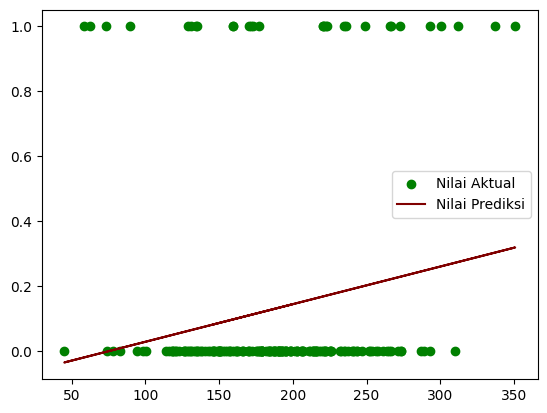

In [130]:
plt.scatter(x_test, y_test, color="green", label="Nilai Aktual")
plt.plot(x_test, y_pred, color= "maroon", label="Nilai Prediksi")
plt.legend()
plt.show()